In [97]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# 1. Load dataset
file_path = "./Contoh/Hasil_RGB_ExG_HH34.xlsx"  
df = pd.read_excel(file_path)
df


,R,G,B,Excess Green (ExG)
0,151,151.4,133.44,18.36
1,151,151.4,116.54,35.26
2,149,151.4,133.44,20.36
3,151,151.4,106.40,45.40
4,149,149.0,106.40,42.60
...,...,...,...,...
93,147,151.4,136.82,18.98
94,149,153.8,140.20,18.40
95,147,153.8,113.16,47.44
96,149,153.8,123.30,35.30


In [98]:
# 2. Pisah fitur dan target
X = df[["R", "G", "B"]]
y = df["Excess Green (ExG)"]

In [99]:
# 3. Split data untuk evaluasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# 4. Inisialisasi dan latih model KNN
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [101]:
# 5. Prediksi terhadap data uji
y_pred = knn_model.predict(X_test)

In [102]:
# 6. Hasil prediksi vs aktual
hasil_prediksi = pd.DataFrame({
    "R": X_test["R"].values,
    "G": X_test["G"].values,
    "B": X_test["B"].values,
    "ExG Aktual": y_test.values,
    "ExG Prediksi": y_pred
})

print("\n========== Hasil Prediksi ==========")
print(hasil_prediksi.head())


========== Hasil Prediksi ==========
     R      G       B  ExG Aktual  ExG Prediksi
0  147  151.4  109.78       46.02     46.020000
1  147  151.4  109.78       46.02     46.020000
2  149  153.8  140.20       18.40     18.593333
3  149  149.0  106.40       42.60     43.933333
4  149  151.4  136.82       16.98     16.980000


In [103]:
# 7. Evaluasi model
y_pred = knn_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n========== Evaluasi Model ==========")
print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)


========== Evaluasi Model ==========
MAE: 2.9456666666666678
MSE: 31.419340000000055
R^2: 0.8340842639089586


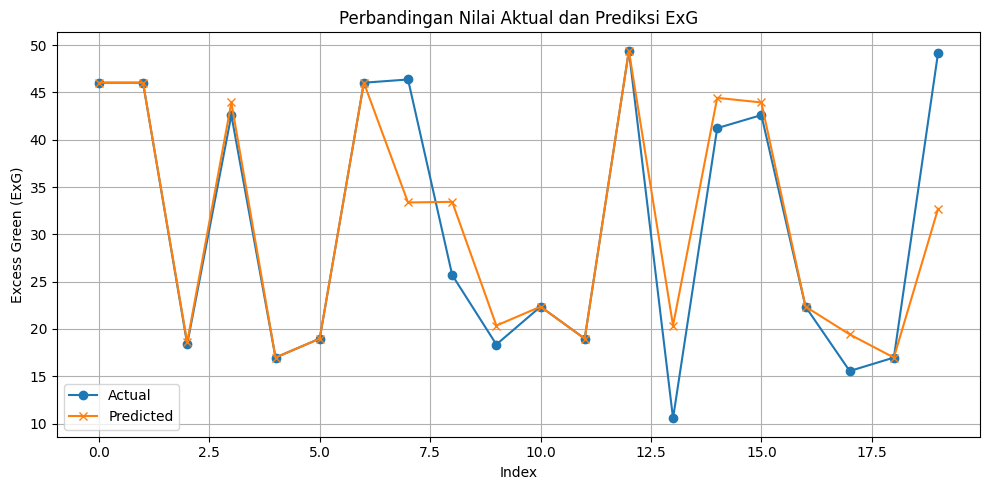

In [104]:
# 8. Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Perbandingan Nilai Aktual dan Prediksi ExG')
plt.xlabel('Index')
plt.ylabel('Excess Green (ExG)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
# 9. Simpan model
import joblib
model_filename = "knn_model.pkl"
joblib.dump(knn_model, model_filename)

['knn_model.pkl']